In [1]:
# importing libraries 
import numpy as np 
import pandas as pd 


In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')  # or any other encoding
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3192,ham,I will lick up every drop :) are you ready to ...,NaN,NaN,NaN
724,ham,The world is running and i am still.maybe all ...,NaN,NaN,NaN
61,ham,Ha ha ha good joke. Girls are situation seekers.,NaN,NaN,NaN
1787,ham,Yes:)sura in sun tv.:)lol.,NaN,NaN,NaN
2594,ham,"ThatÛ÷s the thing with apes, u can fight to t...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
# steps 
# 1. Data cleaning 
# 2. EDA 
# 3. Text preprocessing 
# 4. model building 
# 5. evaluation
# 6. improvement 
# 7. website 
# 8. Deploy

## 1. Data Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# dropping last 3 columns 
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renaming the columns 
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)
df.sample(5)

,target,text
426,ham,aathi..where are you dear..
3868,ham,No let me do the math. Your not good at it.
792,ham,Y?WHERE U AT DOGBREATH? ITS JUST SOUNDING LIKE...
1551,ham,In e msg jus now. U said thanks for gift.
4574,ham,Not directly behind... Abt 4 rows behind Ì_...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.sample(5)

,target,text
1879,1,U have a secret admirer who is looking 2 make ...
4359,0,"Night sweet, sleep well! I've just been to see..."
2742,0,No * am working on the ringing u thing but hav...
329,0,I'm reading the text i just sent you. Its mean...
2980,0,7 wonders in My WORLD 7th You 6th Ur style 5th...


In [12]:
# missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check duplicates 
df.duplicated().sum()

403

In [14]:
# removing duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

## 2. EDA

In [16]:
# checking for the data distribution 
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

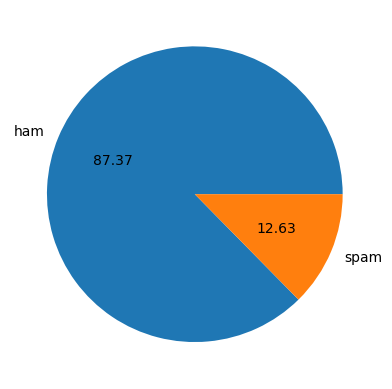

In [17]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [18]:
# here the data is imbalanced 


In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df.sample(5)

,target,text,num_characters
1622,1,U have a secret admirer who is looking 2 make ...,132
2126,0,You do got a shitload of diamonds though,40
2136,0,Well done and ! luv ya all,27
322,0,cud u tell ppl im gona b a bit l8 cos 2 buses ...,107
4029,0,"Cool, I'll text you in a few",28


In [23]:
# now finding out the num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df[['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# for ham(not spam)
df[df['target']==0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# for spam 
df[df['target']==1][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

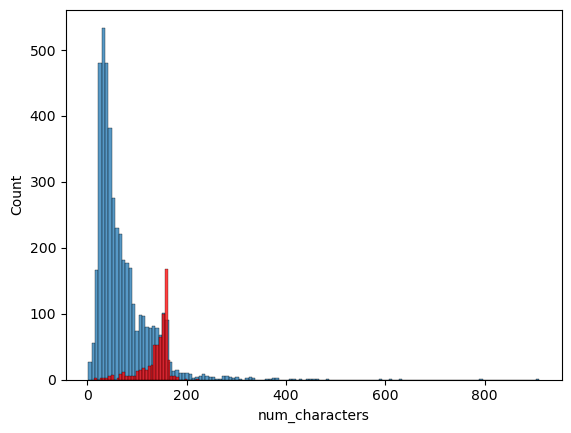

In [30]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

## 3.Data preprocessing 
* Lowercase 
* Tokenization 
* Removing special characters 
* Removing stopwords and punctuations 
* Stemming

In [31]:
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower() # converting all text in lowercase
    text = nltk.word_tokenize(text) # tokenizing on words

    y =[]
    for i in text:
        if i.isalnum():  # checking for special character 
            y.append(i)

    text = y[:]  # cloning the list 
    y.clear()
    for i in text : # this code is for removing stopwords and puctuations 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    # return y


In [32]:
df['transformed_text'] = df['text'].apply(transform_text)

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from wordcloud import WordCloud 
wc = WordCloud(width=600, height=600, min_font_size=10, background_color='white')


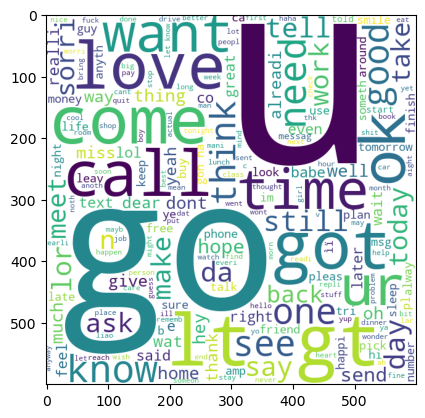

In [35]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

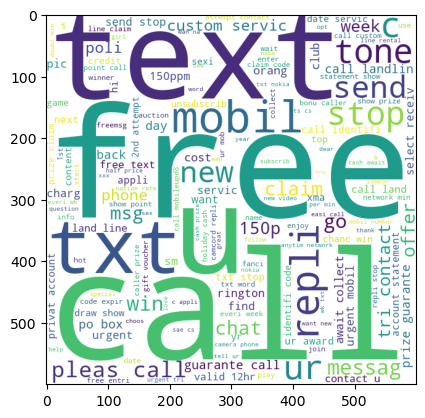

In [36]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
# plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [37]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
            spam_corpus.append(word)

In [38]:
len(spam_corpus)

9939

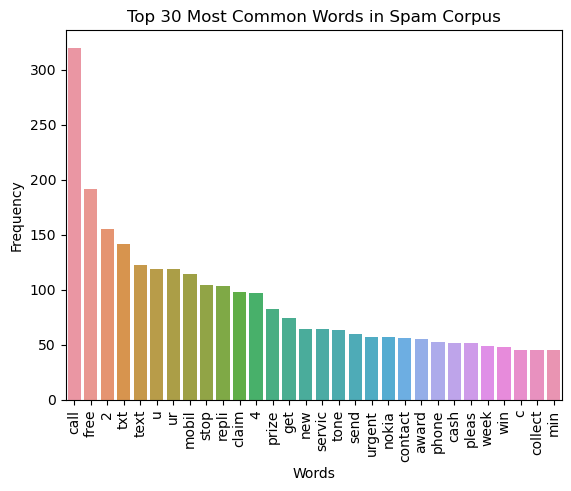

In [39]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()


In [40]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

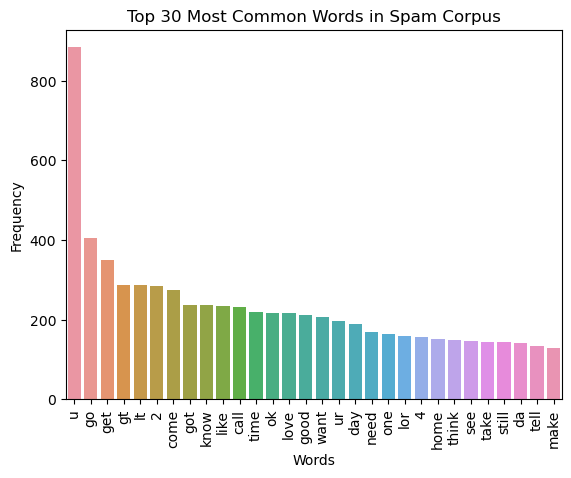

In [41]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()


In [42]:
# Text Vectorization 
# using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building


In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [44]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [45]:
X.shape

(5169, 3000)

In [46]:
y = df['target'].values

In [47]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
from sklearn.model_selection import train_test_split


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [50]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score is ', accuracy_score(y_test, y_pred1))
print('precision Score is ', precision_score(y_test, y_pred1))
print( confusion_matrix(y_test, y_pred1), 'is Confussion matrix ')

Accuracy Score is  0.8694390715667312
precision Score is  0.5068493150684932
[[788 108]
 [ 27 111]] is Confussion matrix 


In [53]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score is ', accuracy_score(y_test, y_pred2))
print('precision Score is ', precision_score(y_test, y_pred2))
print( confusion_matrix(y_test, y_pred2), 'is Confussion matrix ')

Accuracy Score is  0.9709864603481625
precision Score is  1.0
[[896   0]
 [ 30 108]] is Confussion matrix 


In [54]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score is ', accuracy_score(y_test, y_pred3))
print('Precision Score is ', precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

Accuracy Score is  0.9835589941972921
Precision Score is  0.991869918699187
[[895   1]
 [ 16 122]]


In [55]:
# here we choosed
# tfidf --> MNB

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver= 'liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [58]:
clfs ={
    'SVC':svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC': bc,
    'ETC' : etc,
    'GBDT': gbdt,
    'xgb':xgb
}

In [59]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [60]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [61]:
accuracy_scores =[]
precision_scores=[]

for name, clf in clfs.items():
    current_accuracy, current_precision= train_classifier(clf, X_train, y_train, X_test, y_test)

    print('\n For', name)
    print('Accuracy- ', current_accuracy)
    print('Precision- ', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



 For SVC
Accuracy-  0.9758220502901354
Precision-  0.9747899159663865

 For KN
Accuracy-  0.9052224371373307
Precision-  1.0

 For NB
Accuracy-  0.9709864603481625
Precision-  1.0

 For DT
Accuracy-  0.9323017408123792
Precision-  0.8333333333333334

 For LR
Accuracy-  0.9584139264990329
Precision-  0.9702970297029703

 For RF
Accuracy-  0.9758220502901354
Precision-  0.9829059829059829


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



 For AdaBoost
Accuracy-  0.960348162475822
Precision-  0.9292035398230089

 For BgC
Accuracy-  0.9584139264990329
Precision-  0.8682170542635659

 For ETC
Accuracy-  0.9748549323017408
Precision-  0.9745762711864406

 For GBDT
Accuracy-  0.9468085106382979
Precision-  0.9191919191919192

 For xgb
Accuracy-  0.9671179883945842
Precision-  0.9262295081967213


In [62]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False) 

In [63]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [64]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [65]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


In [66]:
# Let's try to imporve the model 
# 1. Change the parameter max_features of TfIdf


In [67]:
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))